In [91]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [92]:
kle = pd.read_csv('data/Life Expectancy Data.csv')

In [93]:
kle

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [123]:
kle_data = kle.groupby('Country').mean()

In [61]:
# kle.Year = pd.to_datetime(kle.Year, format = '%Y')
# kle.Year

In [64]:
kle.Status.value_counts(normalize=True)

Developing    0.825732
Developed     0.174268
Name: Status, dtype: float64

In [95]:
status = pd.get_dummies(kle.Status)

In [96]:
kle = pd.concat([kle, status], axis = 1)

In [97]:
kle = kle.drop(['Status'], axis=1)

In [98]:
kle.drop(['Developing'], axis=1, inplace=True)

In [101]:
kle.drop(['Adult Mortality'], axis=1, inplace=True)

In [102]:
kle.columns

Index(['Country', 'Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed'],
      dtype='object')

Text(0, 0.5, 'Life Expectancy')

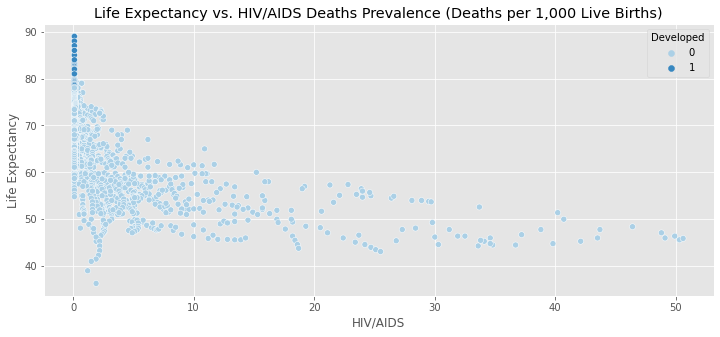

In [105]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(' HIV/AIDS', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. HIV/AIDS Deaths Prevalence (Deaths per 1,000 Live Births)')
plt.xlabel('HIV/AIDS')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

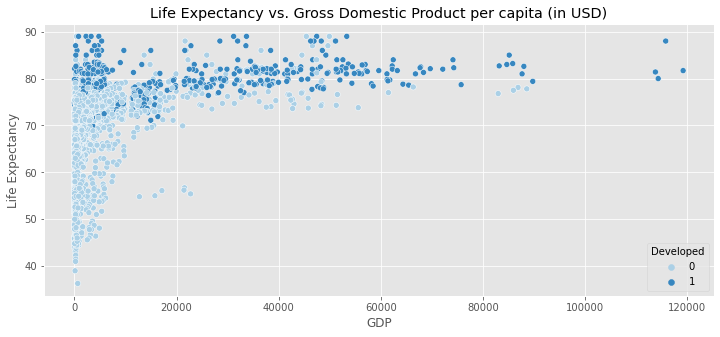

In [106]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('GDP', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Gross Domestic Product per capita (in USD)')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')

Text(0, 0.5, 'Life Expectancy')

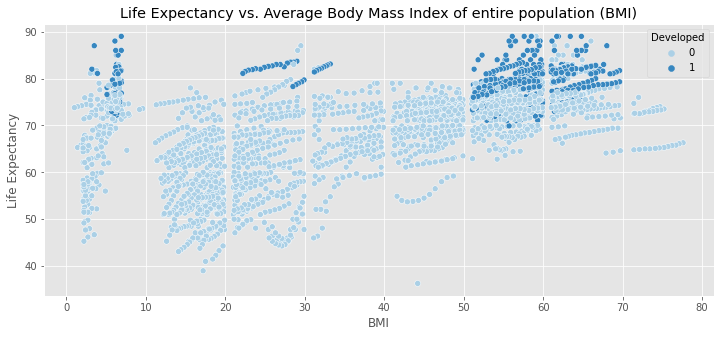

In [108]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(' BMI ', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Average Body Mass Index of entire population (BMI)')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

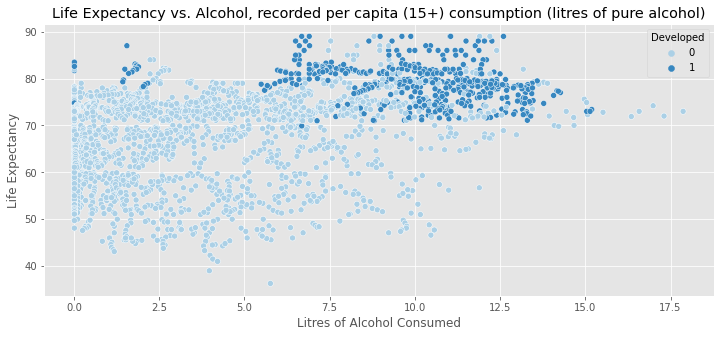

In [109]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Alcohol', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Alcohol, recorded per capita (15+) consumption (litres of pure alcohol)')
plt.xlabel('Litres of Alcohol Consumed')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

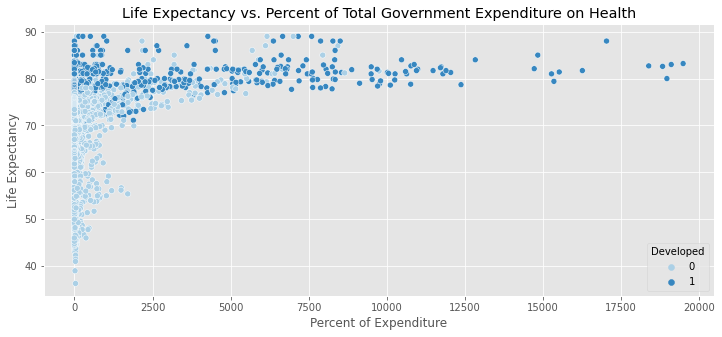

In [110]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('percentage expenditure', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Percent of Total Government Expenditure on Health')
plt.xlabel('Percent of Expenditure')
plt.ylabel('Life Expectancy')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Life Expectancy')

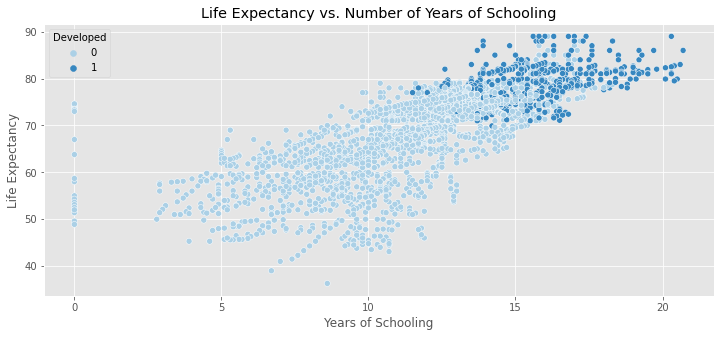

In [111]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot('Schooling', 'Life expectancy ', data=kle, hue='Developed', palette='Blues', ax=ax)
plt.title('Life Expectancy vs. Number of Years of Schooling')
plt.xlabel('Years of Schooling')
plt.ylabel('Life Expectancy')

<AxesSubplot:>

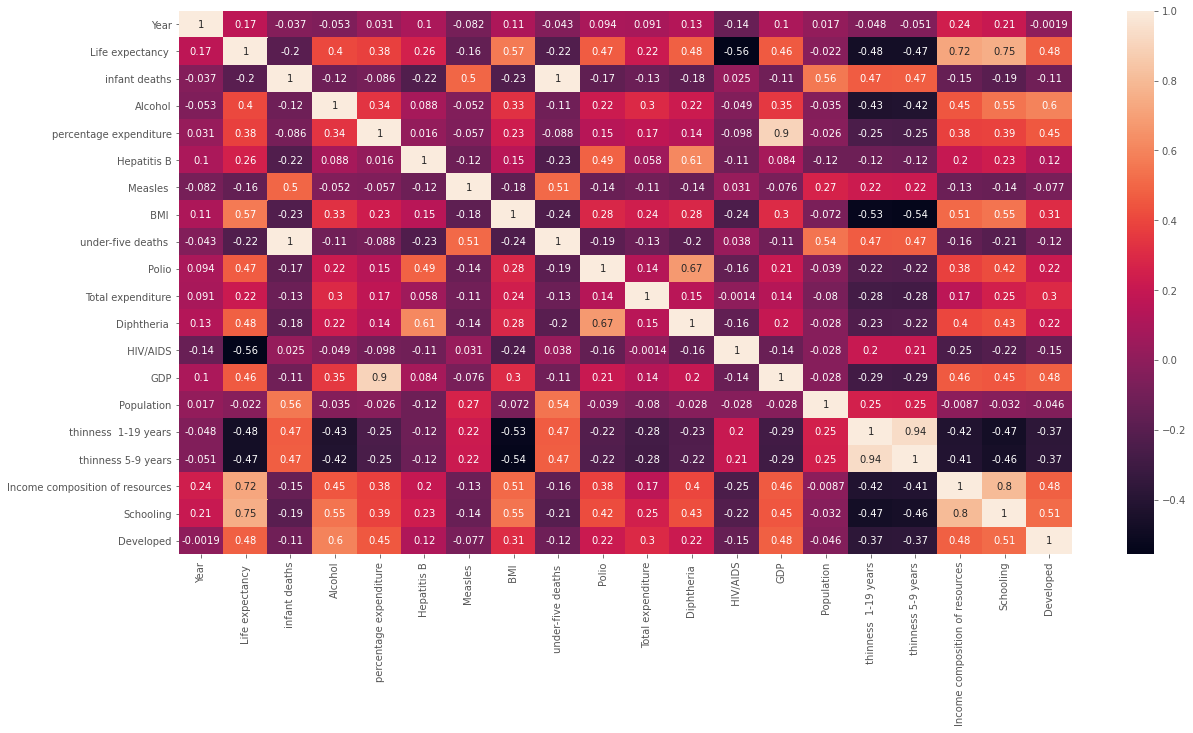

In [112]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(kle.corr(), annot=True, ax=ax)

In [124]:
kle_labels = kle_data['Life expectancy ']

In [125]:
kle_data.head()

,Year,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,58.19375,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0
Albania,2007.5,75.15625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0
Algeria,2007.5,73.61875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0
Angola,2007.5,49.01875,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0
Antigua and Barbuda,2007.5,75.05625,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,0


In [126]:
kle_features = kle_data.drop(['Life expectancy '], axis=1)

In [127]:
kle_features.isnull().head()

,Year,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Albania,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Algeria,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Angola,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Antigua and Barbuda,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [128]:
kle_features.isnull().sum()

Year                                0
infant deaths                       0
Alcohol                             2
percentage expenditure              0
Hepatitis B                         9
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
GDP                                30
Population                         48
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    17
Schooling                          13
Developed                           0
dtype: int64

In [129]:
kle_labels.isnull().sum()

0

In [130]:
kle_features.fillna(value=kle_features.mean(), inplace=True)

In [131]:
kle_labels.fillna(value = kle_labels.mean(), inplace=True)

In [132]:
min_max_scaler = MinMaxScaler()

In [133]:
kle_features_scaled = min_max_scaler.fit_transform(kle_features)

In [134]:
kle_features_scaled

array([[0.00000000e+00, 5.72552248e-02, 3.24378429e-04, ...,
        3.54720225e-01, 4.09856519e-01, 0.00000000e+00],
       [0.00000000e+00, 5.03041112e-04, 3.58762543e-01, ...,
        7.22960300e-01, 6.05739239e-01, 0.00000000e+00],
       [0.00000000e+00, 1.48625783e-02, 2.94103109e-02, ...,
        7.04204439e-01, 6.34435434e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.88105364e-02, 2.76802926e-03, ...,
        4.29899969e-01, 4.24516532e-01, 0.00000000e+00],
       [0.00000000e+00, 2.44660905e-02, 1.65290890e-01, ...,
        4.58580807e-01, 5.59575795e-01, 0.00000000e+00],
       [0.00000000e+00, 1.94356793e-02, 3.31570362e-01, ...,
        3.84417005e-01, 4.90330630e-01, 0.00000000e+00]])

In [135]:
kle_features_train, kle_features_test, kle_labels_train, kle_labels_test = train_test_split(kle_features_scaled, kle_labels, train_size=0.8, test_size=0.2)

In [136]:
linear_model = LinearRegression()

In [137]:
linear_model.fit(kle_features_train, kle_labels_train)

LinearRegression()

In [138]:
print('R_square score on the training set: %.2f' % linear_model.score(kle_features_train, kle_labels_train))

R_square score on the training set: 0.87


In [139]:
linear_model_predict = linear_model.predict(kle_features_test)

In [140]:
print('Coefficients: \n', linear_model.coef_)
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))
print('R_square score: %.2f' % r2_score(kle_labels_test, linear_model_predict))

Coefficients: 
 [ -3.09404952  67.75215611  -1.52039205   4.25753151  -4.66702392
   6.65200986   6.73858317 -80.61675195   1.39221313   6.06013368
  10.49068632 -29.10256239   2.12477501   7.0702299  -17.85283897
  17.92188556   9.98168176   8.62438297   0.60427202]
Mean squared error: 20.45
Mean absolute error: 3.59
R_square score: 0.73


In [141]:
scoring = make_scorer(r2_score)

In [142]:
scoring

make_scorer(r2_score)

In [143]:
grid_cv = GridSearchCV(Ridge(), param_grid={'alpha': range(0, 10), 'max_iter': [10, 1000, 1000]}, scoring=scoring, cv=5)

In [144]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best Params: ' + str(grid_cv.best_params_))
print('Best Estimator: ' + str(grid_cv.best_estimator_))
print('Best Score: ' + str(grid_cv.best_score_))


Best Params: {'alpha': 1, 'max_iter': 10}
Best Estimator: Ridge(alpha=1, max_iter=10)
Best Score: 0.7942453737015368


In [145]:
result = grid_cv.cv_results_
result

{'mean_fit_time': array([0.00137119, 0.00093846, 0.00093565, 0.00084672, 0.0009356 ,
        0.00111451, 0.00077009, 0.00110283, 0.00130196, 0.00103674,
        0.00092921, 0.00068841, 0.000879  , 0.00076818, 0.00073304,
        0.00060635, 0.0006278 , 0.00061116, 0.00063248, 0.00060663,
        0.00063105, 0.00061741, 0.0006084 , 0.00064826, 0.00059357,
        0.00061307, 0.00069885, 0.00059857, 0.00061798, 0.00062819]),
 'std_fit_time': array([3.98240892e-04, 1.73743482e-04, 1.29343571e-04, 7.38419868e-05,
        2.58001574e-04, 1.47417553e-04, 7.16291314e-05, 1.36136015e-04,
        3.47661164e-04, 2.01418330e-04, 2.94609685e-04, 1.16193446e-04,
        2.38900908e-04, 1.21919811e-04, 1.70220353e-04, 1.68980755e-05,
        4.29596672e-05, 3.88903311e-05, 8.61336606e-05, 3.37722589e-05,
        4.65228880e-05, 4.04254432e-05, 3.51831511e-05, 6.86628951e-05,
        1.47885646e-05, 3.79969508e-05, 1.89377629e-04, 2.10266264e-05,
        3.21739667e-05, 5.75902829e-05]),
 'mean_scor

In [146]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.84
R_square score: 0.81
Mean squared error: 20.45
mean absolute error: 3.59


In [147]:
scoring = make_scorer(r2_score)

In [148]:
grid_cv = GridSearchCV(Lasso(), param_grid={'alpha': range(1, 100), 'max_iter': [10, 100, 1000, 10000]}, scoring=scoring, cv=5)

In [149]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': range(1, 100),
                         'max_iter': [10, 100, 1000, 10000]},
             scoring=make_scorer(r2_score))

In [150]:
print('Best parameters: ' + str(grid_cv.best_params_))

Best parameters: {'alpha': 1, 'max_iter': 10}


In [151]:
result = grid_cv.cv_results_

In [152]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.39
R_square score: 0.30
Mean squared error: 20.45
Mean absolute error: 3.59


In [153]:
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(ElasticNet(), param_grid = {'alpha': range(1, 10), 'max_iter': [10, 100, 1000], 'l1_ratio': [0.1, 0.4, 0.8]}, scoring=scoring, cv=5)

In [154]:
grid_cv.fit(kle_features_train, kle_labels_train)
print('Best parameters: ' + str(grid_cv.best_params_))


Best parameters: {'alpha': 1, 'l1_ratio': 0.1, 'max_iter': 10}


In [155]:
result = grid_cv.cv_results_

In [156]:
print('R_square score on training data: %.2f' % grid_cv.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, linear_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, linear_model_predict))

R_square score on training data: 0.25
R_square score: 0.24
Mean squared error: 20.45
Mean absolute error: 3.59


### Decision Tree Regressor 

In [157]:
dt_model = DecisionTreeRegressor()

In [158]:
dt_fit = dt_model.fit(kle_features_train, kle_labels_train)

In [159]:
dt_score = cross_val_score(dt_fit, kle_features_train, kle_labels_train, cv=5)

In [160]:
print('Mean Cross Val Score: %.2f' % np.mean(dt_score))
print('Score without CV: %.2f' % dt_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, dt_fit.predict(kle_features_test)))

Mean Cross Val Score: 0.73
Score without CV: 1.00
R_square score on the test data: 0.66


In [161]:
dt_model_predict = dt_model.predict(kle_features_test)

In [162]:
scoring = make_scorer(r2_score)

In [163]:
grid_cv = GridSearchCV(DecisionTreeRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [164]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [165]:
grid_cv.best_params_

{'min_samples_split': 9}

In [166]:
result = grid_cv.cv_results_

In [167]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.98
R_square score: 0.66
Mean squared error: 26.57
Mean absolute error: 3.58


In [168]:
rf_model = RandomForestRegressor()

In [169]:
rf_fit = rf_model.fit(kle_features_train, kle_labels_train)

In [170]:
rf_score = cross_val_score(rf_fit, kle_features_train, kle_labels_train, cv=5)

In [171]:
print('Mean cross val score: %.2f' % np.mean(rf_score))
print('Score without cv: %.2f' % rf_fit.score(kle_features_train, kle_labels_train))
print('R_square score on the test data: %.2f' % r2_score(kle_labels_test, rf_fit.predict(kle_features_test)))

Mean cross val score: 0.87
Score without cv: 0.98
R_square score on the test data: 0.78


In [172]:
rf_model_predict = rf_model.predict(kle_features_test)

In [173]:
scoring = make_scorer(r2_score)

In [174]:
grid_cv = GridSearchCV(RandomForestRegressor(), param_grid = {'min_samples_split': range(2, 10)}, scoring=scoring, cv=5)

In [175]:
grid_cv.fit(kle_features_train, kle_labels_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': range(2, 10)},
             scoring=make_scorer(r2_score))

In [176]:
grid_cv.best_params_

{'min_samples_split': 8}

In [177]:
result = grid_cv.cv_results_

In [178]:
print('R_square score on training data: %.2f' % grid_cv.best_estimator_.score(kle_features_train, kle_labels_train))
print('R_square score: %.2f' % r2_score(kle_labels_test, grid_cv.best_estimator_.predict(kle_features_test)))
print('Mean squared error: %.2f' % mean_squared_error(kle_labels_test, dt_model_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(kle_labels_test, dt_model_predict))

R_square score on training data: 0.97
R_square score: 0.77
Mean squared error: 26.57
Mean absolute error: 3.58


In [179]:
kle_features

,Year,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Developed
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2007.5,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,0
Albania,2007.5,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,0
Algeria,2007.5,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,0
Angola,2007.5,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,0
Antigua and Barbuda,2007.5,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,1.257006e+07,3.42500,3.37500,0.488625,8.84375,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),2007.5,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,7223.452050,1.257006e+07,1.65000,1.56250,0.726812,12.78750,0
Viet Nam,2007.5,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,7223.452050,1.257006e+07,14.92500,15.62500,0.627063,11.51250,0
Yemen,2007.5,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,7223.452050,1.257006e+07,13.83125,13.75000,0.475500,8.50625,0


In [180]:
kle_data.columns

Index(['Year', 'Life expectancy ', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Developed'],
      dtype='object')

In [184]:
feature_importances = pd.DataFrame(rf_fit.feature_importances_,
                                   index = kle_features.columns, columns=['importance']).sort_values('importance', ascending=False)

In [185]:
feature_importances

,importance
HIV/AIDS,0.667972
percentage expenditure,0.115250
Schooling,0.072206
Income composition of resources,0.031020
BMI,0.013518
Total expenditure,0.011965
thinness 5-9 years,0.011894
thinness 1-19 years,0.011444
GDP,0.009363
Polio,0.009209
